In [168]:
import pandas as pd
from matplotlib import pyplot as plt
import cv2
import numpy as np
pd.options.mode.chained_assignment = None

In [169]:
processed_identites_path = "../../Dataset/celeb_identity_processed.txt"
processed_attributes_path = "../../Dataset/celeb_attrs_processed.txt"
pictures_path = "C:\\Users\\adria\\Desktop\\ml_project-main\\Dataset\\img_celeba_cropped\\"

In [170]:
celeb_df = pd.read_csv(processed_identites_path)
attrs_df = pd.read_csv(processed_attributes_path)

In [171]:
celeb_id

,image,identity
0,000001.jpg,2880
1,000002.jpg,2937
2,000004.jpg,5805
3,000005.jpg,9295
4,000006.jpg,4153
...,...,...
137917,202593.jpg,10139
137918,202594.jpg,8984
137919,202595.jpg,9761
137920,202597.jpg,9852


In [172]:
attrs_df

,image,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Narrow_Eyes,No_Beard,Oval_Face,Pointy_Nose,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Lipstick,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,-1,1,1,1,-1,1,1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,1,-1,-1,...,-1,1,-1,-1,1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,1,-1,-1,-1,...,1,1,-1,1,-1,-1,1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,1,-1,1,-1,1,-1,1,1,1
4,000005.jpg,-1,1,1,-1,-1,1,-1,-1,-1,...,1,1,-1,1,-1,-1,-1,-1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185725,202594.jpg,-1,1,1,-1,-1,1,-1,-1,-1,...,-1,1,-1,1,-1,-1,1,1,1,1
185726,202595.jpg,-1,-1,1,-1,-1,1,-1,-1,1,...,-1,1,-1,-1,-1,-1,-1,-1,1,1
185727,202596.jpg,-1,-1,-1,-1,1,1,-1,-1,1,...,1,1,-1,-1,1,1,-1,-1,-1,1
185728,202598.jpg,-1,1,1,-1,-1,1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,1


In [173]:
# function that recieves the attribute and the initial number of pairs to generate
# gets sample of identities for the selected attribute 
# then looks for positive pairs for each identitiy in the sample
# calculates the number of attributes in the pictures
# returns a dataset with more or less balacned attributes
# pairs format: [[containing_id_list[0], containing_id_list[1], 1], [containing_id_list[0], negative, 0]]

def balanced_pairs(celeb_df = celeb_df, attrs_df = attrs_df, attribute, no_pairs):
    attrs_df_sample = attrs_df.loc[attrs_df[attribute] == 1].sample(n = no_pairs)
    
    celeb_df_for_sample = celeb_df[celeb_df["image"].isin(attrs_df_sample["image"])]
    celeb_df_without_sample = celeb_df[~celeb_df["image"].isin(attrs_df_sample["image"])]
    
    for index, row in celeb_df_for_sample.iterrows():
        positive_pairs.append(celeb_df_without_sample.loc[celeb_df_without_sample["identity"] == row["identity"]]["image"].sample(1).to_string(header=False, index=False))
        negative_pairs.append(celeb_df_without_sample.loc[celeb_df_without_sample["identity"] != row["identity"]]["image"].sample(1).to_string(header=False, index=False))
    celeb_df_for_sample["positive_pair"] = positive_pairs
    celeb_df_for_sample["negative_pair"] = negative_pairs
    
    sample_attrs_count = attrs_df_sample.drop(columns=["image"]).apply(lambda x: x.value_counts())
    sample_attrs_count = sample_attrs_count.transpose()
    attrs_zip = zip(sample_attrs_count.index, sample_attrs_count[1])

SyntaxError: non-default argument follows default argument (3910825267.py, line 8)

In [174]:
attrs_df_sample = attrs_df.loc[attrs_df["Male"] == 1].sample(n = 20)

In [175]:
celeb_df_for_sample = celeb_df[celeb_df["image"].isin(attrs_df_sample["image"])]
celeb_df_without_sample = celeb_df[~celeb_df["image"].isin(attrs_df_sample["image"])]
celeb_df_without_sample

,image,identity
0,000001.jpg,2880
1,000002.jpg,2937
2,000003.jpg,8692
3,000004.jpg,5805
4,000005.jpg,9295
...,...,...
185725,202594.jpg,8984
185726,202595.jpg,9761
185727,202596.jpg,7192
185728,202598.jpg,5570


In [176]:
positive_pairs = []
negative_pairs = []

In [177]:
for index, row in celeb_df_for_sample.iterrows():
    positive_pairs.append(celeb_df_without_sample.loc[celeb_df_without_sample["identity"] == row["identity"]]["image"].sample(1).to_string(header=False, index=False))
    negative_pairs.append(celeb_df_without_sample.loc[celeb_df_without_sample["identity"] != row["identity"]]["image"].sample(1).to_string(header=False, index=False))
celeb_df_for_sample["positive_pair"] = positive_pairs
celeb_df_for_sample["negative_pair"] = negative_pairs

In [178]:
celeb_df_for_sample

,image,identity,positive_pair,negative_pair
6707,007338.jpg,3736,046239.jpg,066531.jpg
10863,011894.jpg,2371,114932.jpg,130699.jpg
17619,019235.jpg,9538,042191.jpg,118888.jpg
37000,040362.jpg,3740,078042.jpg,107810.jpg
37267,040653.jpg,2355,004150.jpg,092149.jpg
40031,043661.jpg,6106,043926.jpg,183659.jpg
44680,048762.jpg,3386,127279.jpg,162342.jpg
45486,049650.jpg,1189,096737.jpg,103432.jpg
53228,058092.jpg,2759,097318.jpg,130846.jpg
55186,060236.jpg,1559,053713.jpg,071928.jpg


In [179]:
def display_images(left, mid, right, n):
    fig, axarr = plt.subplots(3,n-1, figsize=(17,3))
    plt.setp(axarr, xticks=[], yticks=[])
    
    for image, i in zip(left.iloc[:n-1], range(len(left.iloc[:n-1]))):
        img = cv2.imread(image)
        axarr[0,i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axarr[0,i].grid(None)
        
    for image, i in zip(mid.iloc[:n-1], range(len(mid.iloc[:n-1]))):
        img = cv2.imread(image)
        axarr[1,i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axarr[1,i].grid(None)
        
    for image, i in zip(right.iloc[:n-1], range(len(right.iloc[:n-1]))):
        img = cv2.imread(image)
        axarr[2,i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axarr[2,i].grid(None)

In [180]:
celeb_df_for_sample["positive_pair"] = pictures_path + celeb_df_for_sample["positive_pair"]
celeb_df_for_sample["negative_pair"] = pictures_path + celeb_df_for_sample["negative_pair"]
celeb_df_for_sample["image"] = pictures_path + celeb_df_for_sample["image"]

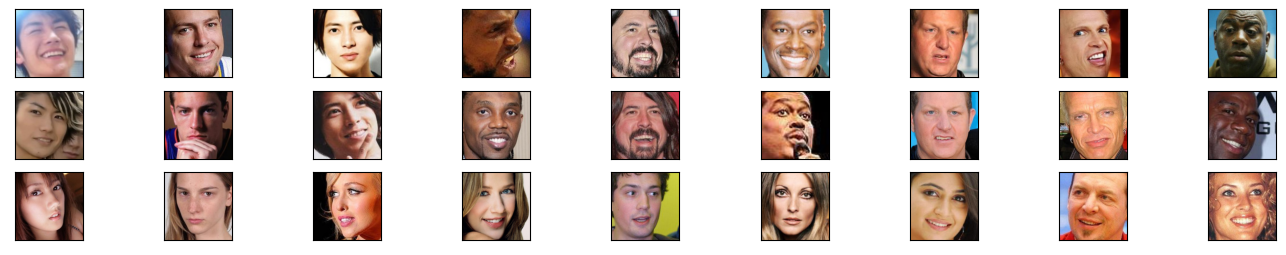

In [181]:
display_images(celeb_df_for_sample["image"], celeb_df_for_sample["positive_pair"], celeb_df_for_sample["negative_pair"], 10)

In [160]:
sample_attrs_count = attrs_df_sample.drop(columns=["image"]).apply(lambda x: x.value_counts())
sample_attrs_count = sample_attrs_count.transpose()
attrs_zip = zip(sample_attrs_count.index, sample_attrs_count[1])

In [162]:
n = 20
attrs_df_attr_images = pd.DataFrame(columns=attrs_df.columns)
for x in attrs_zip:
    if np.isnan(x[1]):
        attrs_df_attr_images = attrs_df.loc[attrs_df[x[0] == 1].sample(n)

In [163]:
attrs_df_attr_images

,image,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Brown_Hair,...,Mouth_Slightly_Open,No_Beard,Oval_Face,Pointy_Nose,Smiling,Wavy_Hair,Wearing_Earrings,Wearing_Lipstick,Wearing_Necklace,Young


In [164]:
sample_attrs_count

,-1,1
Arched_Eyebrows,19.0,1.0
Attractive,9.0,11.0
Bags_Under_Eyes,14.0,6.0
Bangs,18.0,2.0
Big_Lips,19.0,1.0
Big_Nose,17.0,3.0
Black_Hair,9.0,11.0
Blond_Hair,20.0,NaN
Brown_Hair,18.0,2.0
Heavy_Makeup,19.0,1.0
